In [109]:
import torch
import numpy 
import pickle
import matplotlib.pyplot as plt

from valid_train import *
from networks import *

In [110]:
def find_group(fold: list[RunResult]) -> str:
    return fold[0].model_name

def find_groups(folds: list) -> list[str]:
    return list(map(find_group, folds))

In [111]:
with open("./model-outputs/out_valid.pkl", "rb") as f:
    data = pickle.load(f)

In [112]:
print(list(map(lambda x: x[0].model_name, data)))

['JustAggrConvGCNN']


In [113]:
def convert(e):
    return list(map(lambda x: x.item(), e))

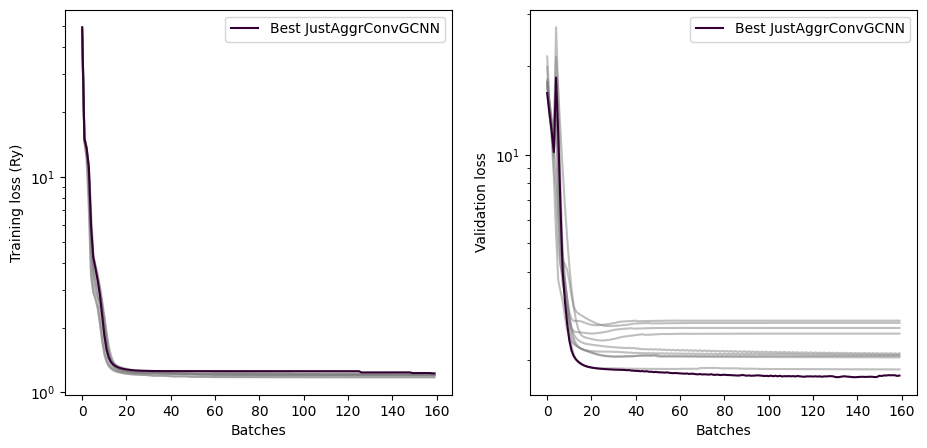

In [ ]:
def plot_fold(fold: list[RunResult], k = 0):

    loss_min_idx = min(
        zip(range(len(fold)), fold), 
        key=lambda x: x[1].v_epoch_avg_losses[-1])[0]
    
    best_res = fold[loss_min_idx]
    other_res = fold[:loss_min_idx] + fold[loss_min_idx+1:]

    model_name = find_group(fold)
    fig, ax = plt.subplots(1,2, figsize=(11, 5))

    # Draw other runs 
    col = (0.5, 0.5, 0.5, 0.5)
    for i, f in enumerate(other_res):
        ax[0].semilogy(f.t_epoch_avg_losses[k:], color=col, )
        
    for i, f in enumerate(other_res):
        ax[1].semilogy(f.v_epoch_avg_losses[k:], color=col)
        
    # Draw best run
    col = (0.2, 0, 0.2, 1)
    ax[0].semilogy(best_res.t_epoch_avg_losses[k:], 
                   color=col, label=f"Best {model_name}")
    ax[1].semilogy(best_res.v_epoch_avg_losses[k:], 
                   color=col, label=f"Best {model_name}")

    # Set labels
    ax[0].set_ylabel("Training loss (Ry)")
    ax[0].set_xlabel("Batches")

    ax[1].set_ylabel("Validation loss (Ry)")
    ax[1].set_xlabel("Batches")

    ax[0].legend()
    ax[1].legend()

    return (fig, ax)
    
for fold in data:
    plot_fold(fold)

[0]

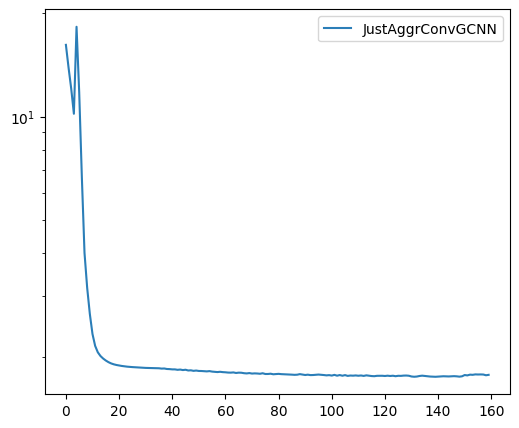

In [115]:
def fold_comparison(folds: list[list[RunResult]]):

    best_models = [    
        (lambda fold: 
            min(
                zip(range(len(fold)),fold), 
                key=lambda x: (x[1].v_epoch_avg_losses[-1]))[0])(f) 
        for f in folds
    ]

    fig, ax = plt.subplots(1,1, figsize=(6, 5))
    col = (0.1, 0.1, 0.3, 0.9)

    for i, m in enumerate(best_models):
        res = folds[i][m]
        ax.semilogy(res.v_epoch_avg_losses, label=res.model_name, alpha=0.95)

    ax.legend()
    return best_models


fold_comparison(data)